In [557]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [558]:
data = pd.read_csv("orbit.csv")
time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()


In [559]:
data.describe()

,time_steps,y
count,2000.000000,2000.000000
mean,0.000000,33.366683
std,5.777835,29.851521
min,-10.000000,0.000025
25%,-5.000000,6.268792
50%,0.000000,25.025044
75%,5.000000,56.268780
max,10.000000,100.000000


In [561]:
X_train, X_val, y_train, y_val = train_test_split(time_steps, y_positions, test_size=0.2, random_state=42)

In [562]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

model = Sequential([
    Dense(128, input_shape=(1,), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(1, activation='linear')
])

In [564]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.1
    epochs_drop = 50
    lr = initial_lr * (drop ** np.floor((1 + epoch) / epochs_drop))
    return max(lr, 1e-6)  

lr_scheduler = LearningRateScheduler(step_decay)

# Compile your model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler])


print('Training started..., this can take a while:')



Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 364.2347 - mae: 11.7123 - val_loss: 458.3702 - val_mae: 14.3410 - lr: 0.0100
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 198.5354 - mae: 9.1285 - val_loss: 542.6434 - val_mae: 16.0287 - lr: 0.0100
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 174.8260 - mae: 8.5832 - val_loss: 416.5074 - val_mae: 14.1341 - lr: 0.0100
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 154.5489 - mae: 8.0313 - val_loss: 438.2195 - val_mae: 14.7144 - lr: 0.0100
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 125.8009 - mae: 7.4589 - val_loss: 467.9933 - val_mae: 14.0773 - lr: 0.0100
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 140.9821 - mae: 7.5570 - val_loss: 207.1920 - val_mae: 9.2709 - lr: 0.0100
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 130.9424 - mae: 7.7062 - val_loss

In [565]:
from sklearn.metrics import r2_score

predictions = model.predict(X_val)
r_squared = r2_score(y_val, predictions)
print(f'R-squared: {r_squared}')

13/13 [==============================] - 0s 833us/step
R-squared: 0.9917929675807177


7/7 [==============================] - 0s 1ms/step


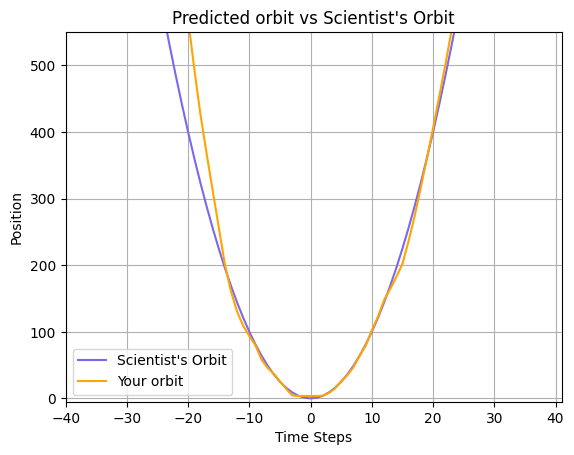

In [566]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue", label="Scientist's Orbit")
    plt.plot(np.arange(-axeslim, axeslim + 1), model_preds, color="orange", label="Your orbit")
    plt.axis([-40, 41, -5, 550])
    plt.legend(loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")
    plt.xlabel('Time Steps')
    plt.ylabel('Position')
    plt.grid(True)

# Predict the eighty minute orbit (with polynomial features)
time_steps = np.arange(-100, 101).reshape(-1, 1)
eighty_min_orbit = model.predict(time_steps)

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)
plt.show()